**1. Importing Necessary Libraries and Reading the dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
from sklearn.metrics import classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Crop_Recommendation_System_Data.csv')
df.head()

,N,P,K,Temperature,Humidity,PH,Rainfall,Label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.size

17608

In [4]:
df.shape

(2201, 8)

In [5]:
df.columns

Index(['N', 'P', 'K', 'Temperature', 'Humidity', 'PH', 'Rainfall', 'Label'], dtype='object')

In [6]:
df['Label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', nan,
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
df.dtypes

N              float64
P              float64
K              float64
Temperature    float64
Humidity       float64
PH             float64
Rainfall       float64
Label           object
dtype: object

In [8]:
df['Label'].value_counts()

rice           101
banana         100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
maize          100
coffee         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
kidneybeans    100
chickpea       100
grapes          99
pigeonpeas      99
jute            99
mango           99
Name: Label, dtype: int64

<AxesSubplot:>

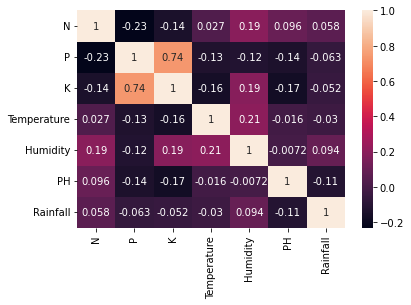

In [9]:
sns.heatmap(df.corr(),annot=True)

 **2. Handling with Null values**

In [10]:
df.isna().sum()

N              8
P              8
K              6
Temperature    9
Humidity       7
PH             6
Rainfall       8
Label          4
dtype: int64

In [11]:
# Removing null values
df = df.dropna()
df.isna().sum()

N              0
P              0
K              0
Temperature    0
Humidity       0
PH             0
Rainfall       0
Label          0
dtype: int64

In [12]:
df.describe()

,N,P,K,Temperature,Humidity,PH,Rainfall
count,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000
mean,50.439161,53.529604,48.243357,25.609763,71.381160,6.471903,103.431853
std,36.928912,32.979714,50.778276,5.062581,22.355713,0.775788,54.946639
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.766430,60.162995,5.971813,64.568076
50%,37.000000,51.000000,32.000000,25.600337,80.451314,6.425420,94.763230
75%,84.000000,68.000000,49.000000,28.558525,89.937010,6.929216,124.226174
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


**So, from the above description data we can get to know that data doesn't contains any outliers 
and the data has no null values as we have cleared from the above step**

 **3. Visualizing the new data which is cleaned perfectly**

Text(0, 0.5, 'Count')

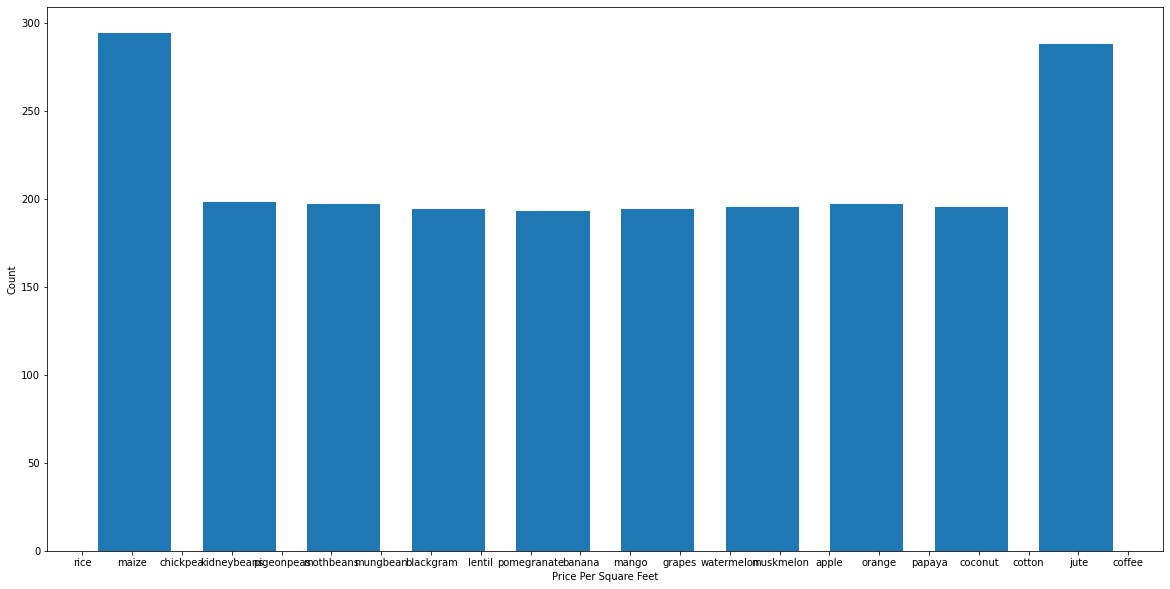

In [13]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df.Label,rwidth=0.7)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

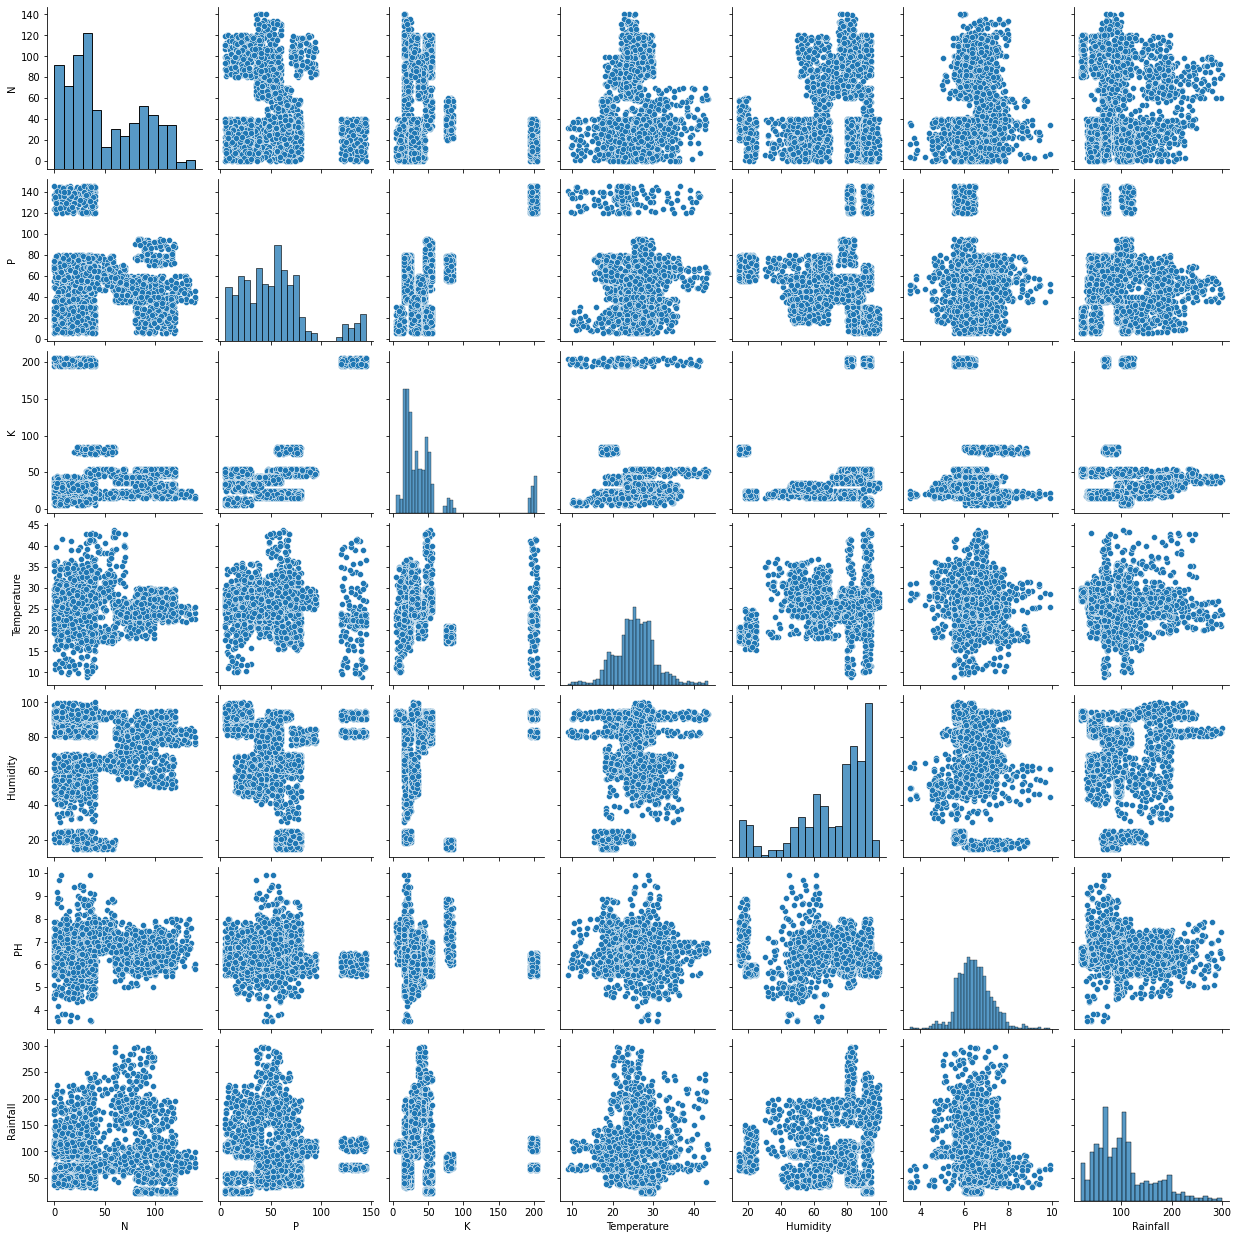

In [14]:
sns.pairplot(df)

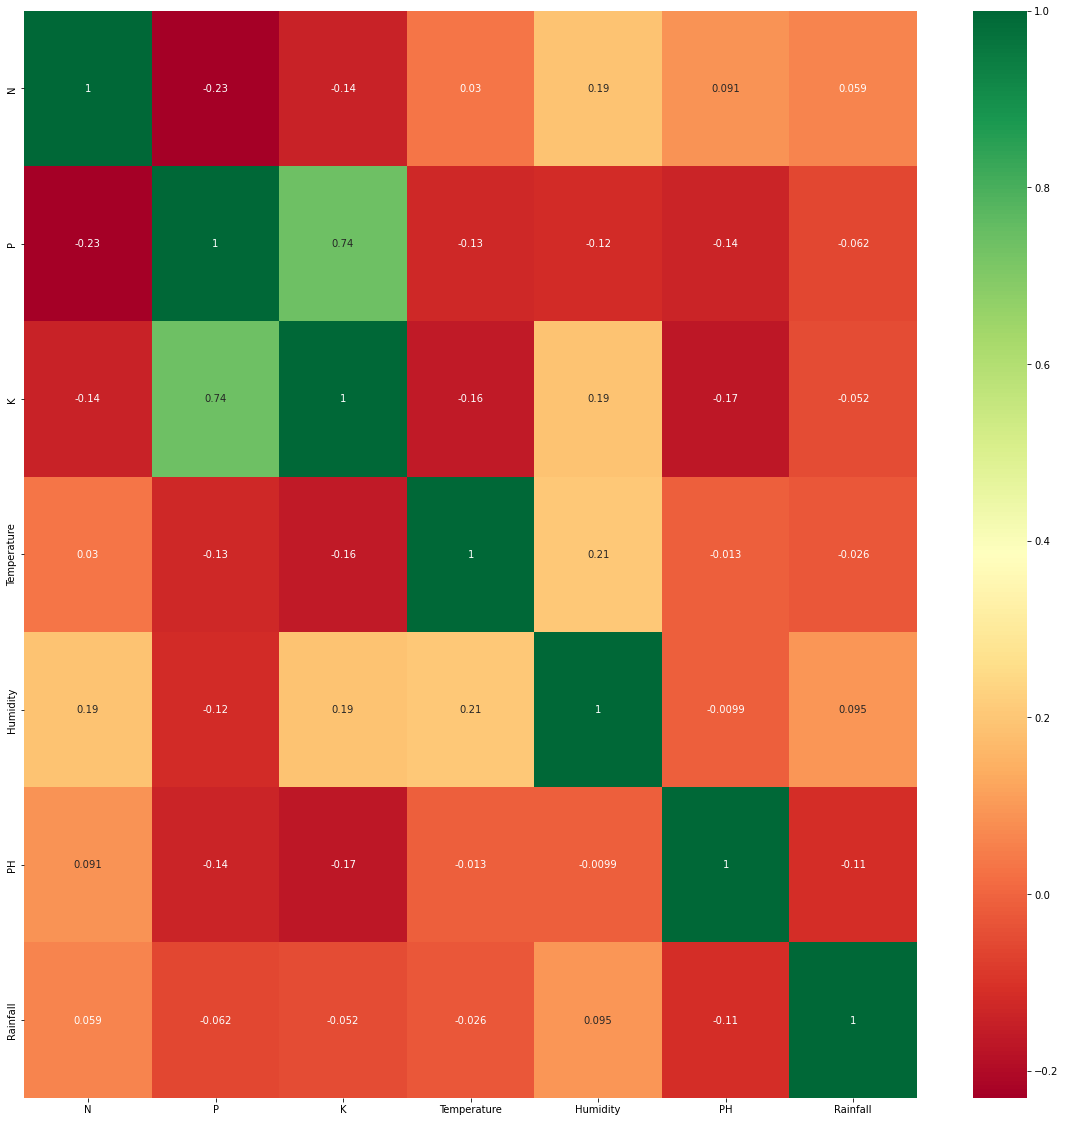

In [15]:
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

 **More graphs are not required here because of the reason that is target variable is categorical 
and the inputs are continious.**

 **4. Building the model**

In [16]:
features = df[['N', 'P','K','Temperature', 'Humidity', 'PH', 'Rainfall']]
target = df['Label']

In [17]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [18]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

 **Decison Tree Algorithm**

In [19]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Trees's Accuracy is: ", x*100)
print(classification_report(y_test,predicted_values))

Decision Trees's Accuracy is:  93.24009324009323
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        17
   blackgram       0.66      1.00      0.79        19
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        17
      coffee       1.00      0.93      0.96        14
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        14
        jute       1.00      0.25      0.40        16
 kidneybeans       1.00      0.82      0.90        17
      lentil       0.87      1.00      0.93        20
       maize       0.95      1.00      0.97        18
       mango       1.00      0.87      0.93        23
   mothbeans       1.00      0.57      0.72        23
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.0

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93473193, 0.90675991, 0.92074592, 0.90675991, 0.87179487])

 **Guassian Naive Bayes Algorithm**

In [22]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Naive Bayes's Accuracy is:  99.3006993006993
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        19
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        14
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        14
        jute       0.88      0.94      0.91        16
 kidneybeans       1.00      1.00      1.00        17
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      1.00      1.00        23
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00   

In [23]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.995338  , 0.995338  , 0.995338  , 0.995338  , 0.99067599])

**Support Vector Machine (SVM) Algorithm**

In [24]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
# transform testing dataabs
X_test_norm = norm.transform(X_test)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,y_train)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  97.66899766899768
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        19
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        14
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        14
        jute       0.74      0.88      0.80        16
 kidneybeans       0.94      1.00      0.97        17
      lentil       0.95      0.95      0.95        20
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        23
   mothbeans       0.96      0.96      0.96        23
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00

In [25]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97202797, 0.97668998, 0.99300699, 0.98368298, 0.98135198])

**Logistic Regression Algorithm**

In [26]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train,y_train)

predicted_values = LogReg.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  93.7062937062937
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       0.94      1.00      0.97        17
   blackgram       0.79      0.79      0.79        19
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        17
      coffee       0.93      1.00      0.97        14
      cotton       1.00      0.90      0.95        21
      grapes       1.00      1.00      1.00        14
        jute       0.70      0.88      0.78        16
 kidneybeans       1.00      1.00      1.00        17
      lentil       0.86      0.95      0.90        20
       maize       0.88      0.78      0.82        18
       mango       0.96      1.00      0.98        23
   mothbeans       0.86      0.78      0.82        23
    mungbean       0.86      0.95      0.90        19
   muskmelon       1.00      1.00      1.00        20
      orange       1.00     

In [27]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.94638695, 0.96503497, 0.96037296, 0.96503497, 0.94172494])

 **Random Forest Algorithm**

In [28]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Random Forest')
print("RF's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

RF's Accuracy is:  99.53379953379954
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        19
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        14
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        14
        jute       0.89      1.00      0.94        16
 kidneybeans       1.00      1.00      1.00        17
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      1.00      1.00        23
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00 

In [29]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.995338  , 0.99067599, 0.99300699, 0.997669  , 0.98601399])

**XGBoost Algorithm**

In [30]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)

predicted_values = XB.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

[15:31:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  98.83449883449883
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        17
   blackgram       0.95      1.00      0.97        19
    chickpea       1.00      0.95      0.97        19
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        14
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        14
        jute       0.94      0.94      0.94        16
 kidneybeans       0.94      1.00      0.97        17
      lentil       1.00      0.95      0.97        2

In [31]:
# pip install xgboost

In [32]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

[15:31:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:31:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:31:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:31:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

array([0.99067599, 0.99300699, 0.99300699, 0.99067599, 0.99300699])

**Accuracy Comparision**

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

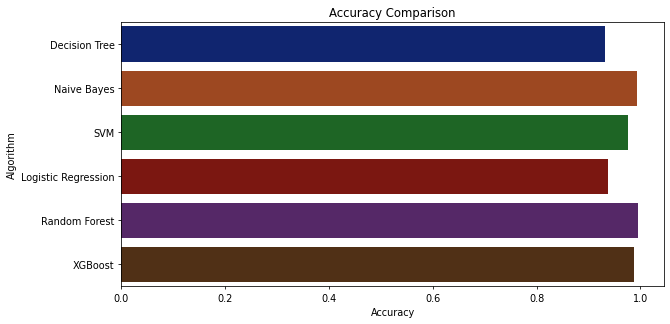

In [33]:
plt.figure(figsize=[10,5],dpi = 70)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [35]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v*100)

Decision Tree --> 93.24009324009323
Naive Bayes --> 99.3006993006993
SVM --> 97.66899766899768
Logistic Regression --> 93.7062937062937
Random Forest --> 99.53379953379954
XGBoost --> 98.83449883449883


 **From the above comparision we conclude that among all the algorithms Random Forests accuracy is more**

**5. Predicting the output using Random Forest**

In [41]:
Nitrogen = input('Enter the amount of Nitrogen in ppm: ')
Phosphorus = input('Enter the amount of Phosphorus in ppm : ')
Pottassium = input('Enter the amount of Pottassium in ppm: ')
Temperature = input('Enter the Value of Temperature in Celcius : ')
Humidity = input('Enter the Humidity value in percentage : ')
PH_Value = input('Enter the PH value : ')
Rainfall = input('Enter the amount of Rainfall in mm: ')
Data = np.array([[Nitrogen,Phosphorus,Pottassium,Temperature,Humidity,PH_Value,Rainfall]])
prediction = RF.predict(Data)
print("The Crop that is best fit in this Conditions is :",prediction[0])

Enter the amount of Nitrogen in ppm: 104
Enter the amount of Phosphorus in ppm : 18
Enter the amount of Pottassium in ppm: 30
Enter the Value of Temperature in Celcius : 23
Enter the Humidity value in percentage : 60
Enter the PH value : 6.7
Enter the amount of Rainfall in mm: 104
The Crop that is best fit in this Conditions is :  coffee
